# Project: Advanced Marketing Campaign Governance and Compliance Dashboard

## Develop a comprehensive dashboard that -
1. #### Tracks and manages marketing campaign compliance
2. #### Ensure all materials adhere to legal, compliance, and brand governance standards.

## Steps to Execute the Project

### 1. Define the Project Scope and Objectives

 ### Objective: 
 #### Create a dashboard to monitor and report on marketing campaign compliance and performance.

### Key Features:
1. #### Request Tracking
2. #### Compliance Validation
3. #### Performance Metrics
4. #### Communication Storage

## Step 1: Load and Prepare the Dataset

In [4]:
import pandas as pd

# Load dataset with the correct delimiter
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic information about the dataset
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 2: Data Cleaning and Feature Engineering
1. #### Handle Missing Values
2. #### Convert Categorical Variables
3. #### Feature Engineering

In [5]:
# Handling missing values
df = df.dropna()

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Feature engineering: Create new features if needed
df['campaign_duration'] = df['campaign'] * df['duration']

# Display cleaned and processed data
print(df.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  ...      False      False   
1          -36.4      4.857       5191.0  ...      False      False   
2          -36.4      4.857       5191.0  ...      False      False   
3          -36.4      4.857       5191.0  ...      False      False   
4          -36.4      4.857       5191.0  ...      False      False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0             True            False  

## Step 3: Data Analysis and Visualization
1. #### Descriptive Statistics
2. #### Visualize Campaign Performance

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

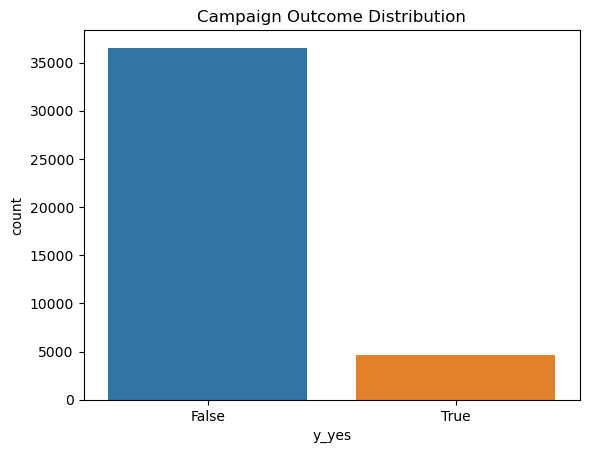

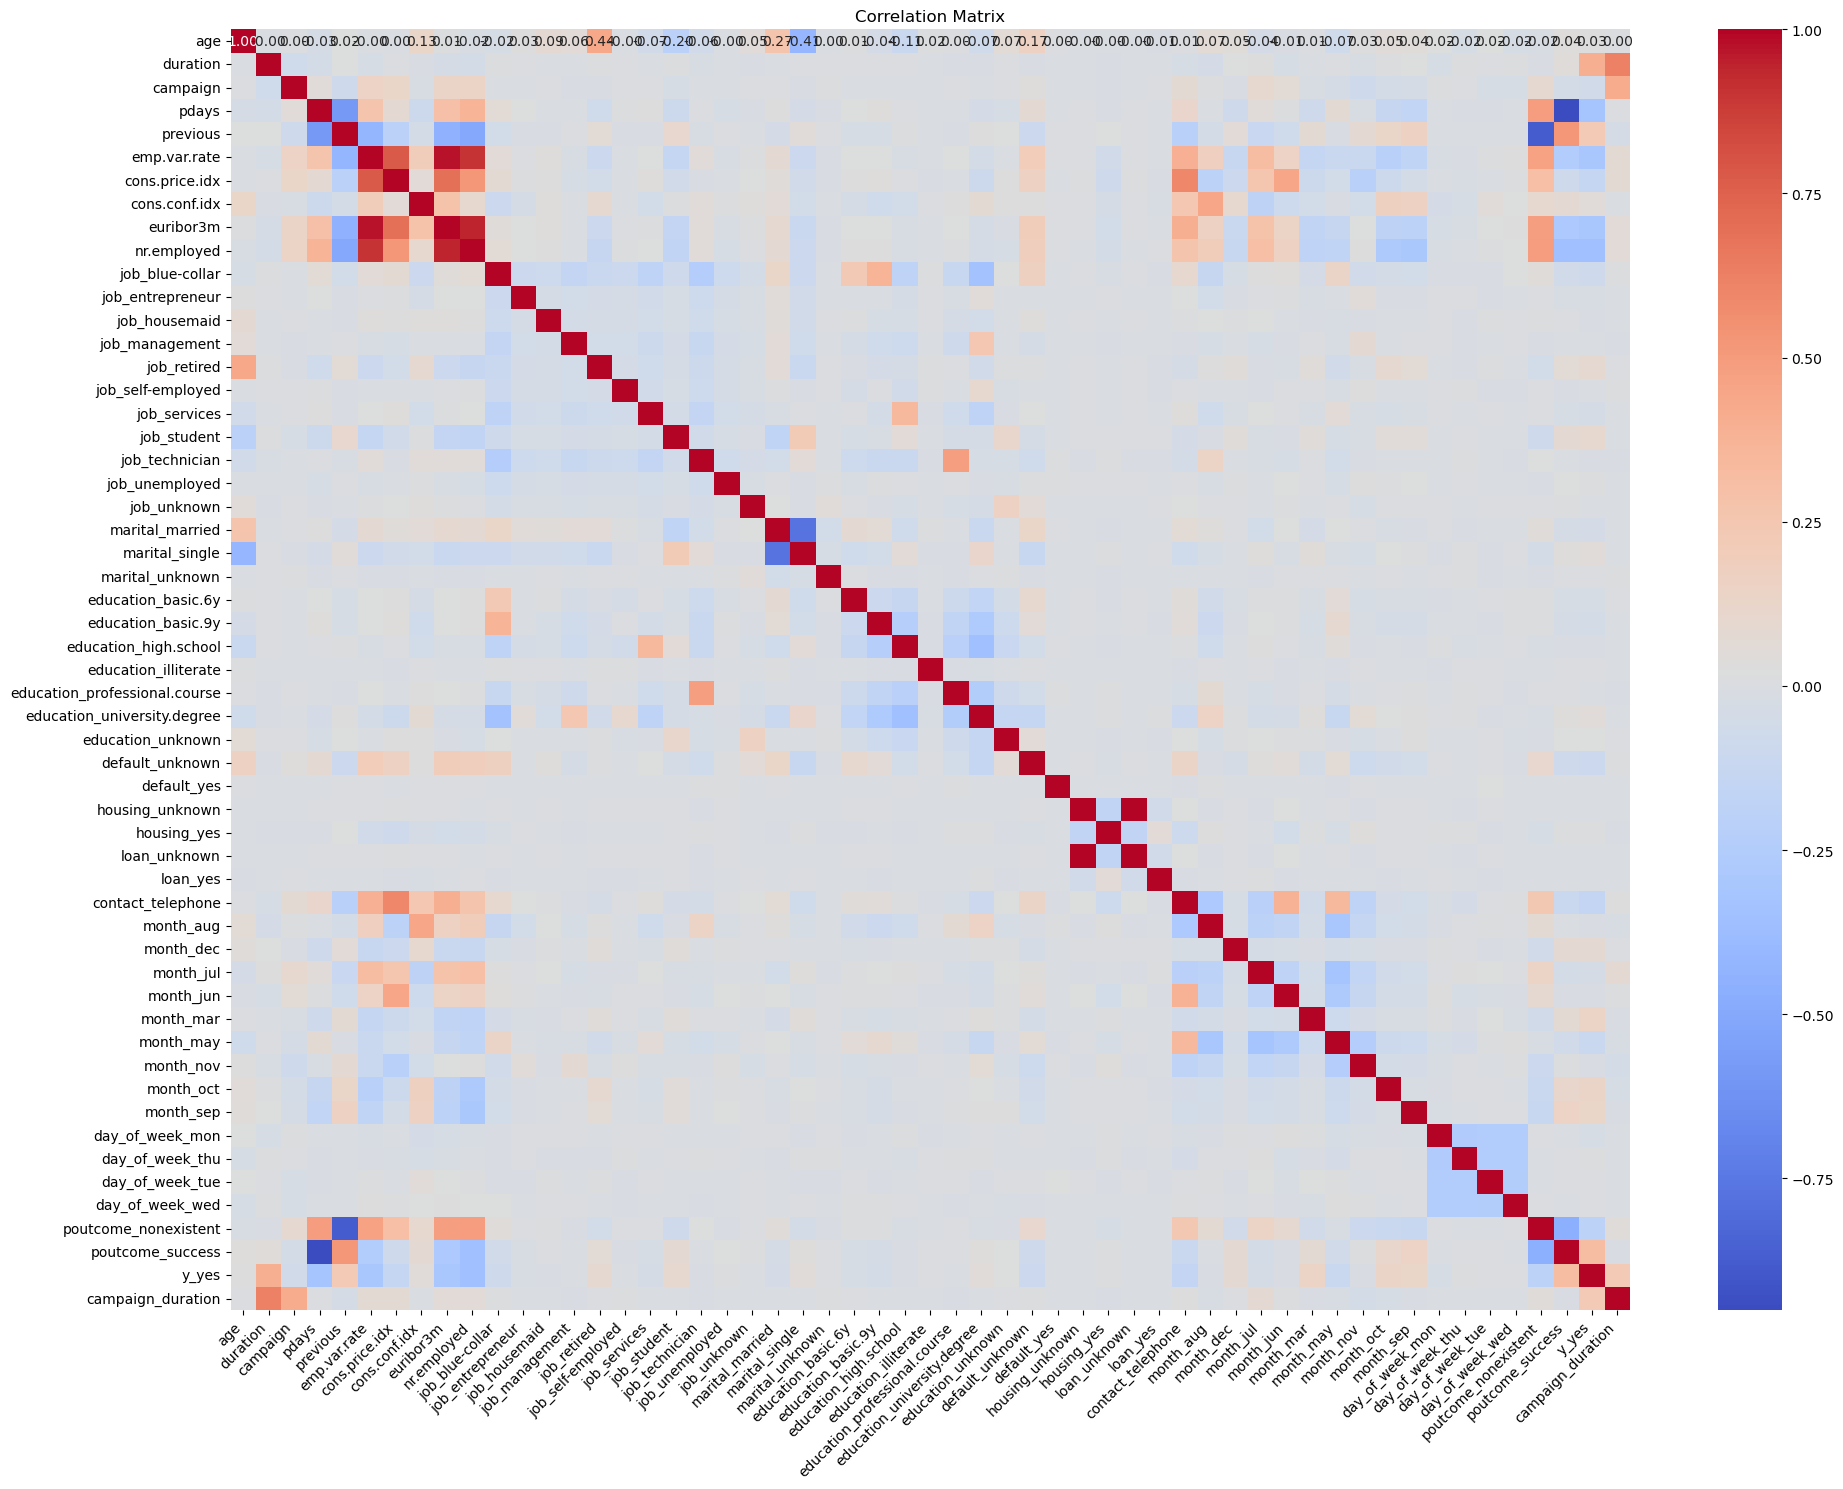

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Visualize the distribution of campaign outcomes
sns.countplot(x='y_yes', data=df)
plt.title('Campaign Outcome Distribution')
plt.show()

# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

## Step 4: Build the Dashboard Using Plotly and Dash
1. #### Dashboard Setup
2. #### Data Visualizations

In [15]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load and process the original dataset
df_original = pd.read_csv('bank-additional-full.csv', sep=';')
df = df_original.dropna()
df = pd.get_dummies(df, drop_first=True)
df['campaign_duration'] = df['campaign'] * df['duration']

# Initialize the Dash app
app = dash.Dash(__name__)

# Campaign outcome distribution
fig1 = px.histogram(df, x='y_yes', title='Campaign Outcome Distribution')

# Age distribution
fig2 = px.histogram(df, x='age', nbins=30, title='Age Distribution')

# Job type distribution
fig3 = px.pie(df_original, names='job', title='Job Type Distribution')  # Use the original dataframe here

# Duration vs Outcome
fig4 = px.box(df, x='y_yes', y='duration', title='Duration vs Campaign Outcome')

# Layout
app.layout = html.Div(children=[
    html.H1(children='Marketing Campaign Governance Dashboard'),
    dcc.Graph(
        id='outcome-distribution',
        figure=fig1
    ),
    dcc.Graph(
        id='age-distribution',
        figure=fig2
    ),
    dcc.Graph(
        id='job-type-distribution',
        figure=fig3
    ),
    dcc.Graph(
        id='duration-vs-outcome',
        figure=fig4
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


## Step 5: Adding Advanced Features
1. #### Predictive Modeling: Build a model to predict campaign success using features such as age, job, duration, etc.
2. #### Compliance Check Automation: Implement checks to ensure campaign materials comply with regulations.
3. #### Detailed Performance Analysis: Analyze performance metrics such as response rates, engagement rates, and conversion rates.

### 1. Predictive Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'bank-additional-full.csv'
df_original = pd.read_csv(file_path, sep=';')

# Clean and process the dataset
df = df_original.dropna()
df = pd.get_dummies(df, drop_first=True)
df['campaign_duration'] = df['campaign'] * df['duration']

# Define features and target variable
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Predictive Modeling Evaluation:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Predictive Modeling Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     10968
        True       0.66      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357

Accuracy: 0.9148660678158129


### 2. Compliance Check Automation

In [25]:
def check_compliance(campaign_materials):
    prohibited_words = ['spam', 'scam', 'fraud']
    mandatory_phrases = ['Contact us', 'Terms and Conditions']
    
    for word in prohibited_words:
        if word in campaign_materials.lower():
            return False
    
    for phrase in mandatory_phrases:
        if phrase not in campaign_materials:
            return False
    
    return True

# Example compliance check
campaign_materials = "Example campaign text with Contact us and Terms and Conditions..."
is_compliant = check_compliance(campaign_materials)
print(f'Compliance Check: {"Pass" if is_compliant else "Fail"}')


Compliance Check: Pass


### 3. Detailed Performance Analysis

In [28]:
# Create a DataFrame for performance analysis
performance_data = {
    'responses': [100, 200, 150, 120, 300] * (len(df) // 5),
    'sent': [1000, 1500, 1200, 1100, 1600] * (len(df) // 5),
    'engagements': [300, 400, 350, 320, 450] * (len(df) // 5),
    'views': [5000, 6000, 5500, 5200, 6500] * (len(df) // 5),
    'conversions': [50, 80, 70, 60, 90] * (len(df) // 5),
    'clicks': [500, 700, 650, 600, 750] * (len(df) // 5)
}

performance_df = pd.DataFrame(performance_data)

# Calculate performance metrics
performance_df['response_rate'] = performance_df['responses'] / performance_df['sent'] * 100
performance_df['engagement_rate'] = performance_df['engagements'] / performance_df['views'] * 100
performance_df['conversion_rate'] = performance_df['conversions'] / performance_df['clicks'] * 100

performance_summary = performance_df[['response_rate', 'engagement_rate', 'conversion_rate']].describe()

print("Detailed Performance Analysis Summary:")
print(performance_summary)


Detailed Performance Analysis Summary:
       response_rate  engagement_rate  conversion_rate
count   41185.000000     41185.000000     41185.000000
mean       13.098485         6.421445        10.839560
std         3.057716         0.335961         0.788454
min        10.000000         6.000000        10.000000
25%        10.909091         6.153846        10.000000
50%        12.500000         6.363636        10.769231
75%        13.333333         6.666667        11.428571
max        18.750000         6.923077        12.000000
